# Forex Signal Model - Data Exploration

This notebook provides comprehensive EDA for the forex signal model:
1. Data Quality Check
2. Price Visualization
3. Intermarket Analysis
4. Technical Indicators
5. Feature Analysis

In [9]:
# Standard imports
import sys
import os
from pathlib import Path

# Add parent directory to path
sys.path.insert(0, str(Path.cwd().parent))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Project imports
from src.utils import load_config

# Settings
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Load config
config = load_config('../config/config.yaml')
print("Config loaded successfully!")

Config loaded successfully!


---
## 1. Data Quality Check

In [10]:
# Load combined data
combined_path = Path('../' + config['data']['paths']['combined'])
features_path = Path('../' + config['data']['paths']['features'])

if combined_path.exists():
    combined_data = pd.read_parquet(combined_path)
    print(f"Combined data shape: {combined_data.shape}")
    print(f"Date range: {combined_data.index.min()} to {combined_data.index.max()}")
    print(f"Total trading days: {len(combined_data)}")
else:
    print(f"Combined data not found at {combined_path}")
    print("Run: python main.py --mode download")
    combined_data = None

Combined data shape: (2510, 35)
Date range: 2016-01-05 00:00:00 to 2026-01-05 00:00:00
Total trading days: 2510


In [11]:
# Data overview
if combined_data is not None:
    print("=" * 60)
    print("DATA OVERVIEW")
    print("=" * 60)
    print(f"\nColumns ({len(combined_data.columns)}):")
    for i, col in enumerate(combined_data.columns, 1):
        print(f"  {i:2d}. {col}")
    
    print("\n" + "=" * 60)
    print("SUMMARY STATISTICS")
    print("=" * 60)
    display(combined_data.describe().round(4))

DATA OVERVIEW

Columns (35):
   1. GBPUSD_Open
   2. GBPUSD_High
   3. GBPUSD_Low
   4. GBPUSD_Close
   5. GBPUSD_Volume
   6. EURUSD_Open
   7. EURUSD_High
   8. EURUSD_Low
   9. EURUSD_Close
  10. EURUSD_Volume
  11. GC=F_Open
  12. GC=F_High
  13. GC=F_Low
  14. GC=F_Close
  15. GC=F_Volume
  16. DX_Y_NYB_Open
  17. DX_Y_NYB_High
  18. DX_Y_NYB_Low
  19. DX_Y_NYB_Close
  20. DX_Y_NYB_Volume
  21. VIX_Open
  22. VIX_High
  23. VIX_Low
  24. VIX_Close
  25. VIX_Volume
  26. TNX_Open
  27. TNX_High
  28. TNX_Low
  29. TNX_Close
  30. TNX_Volume
  31. CL=F_Open
  32. CL=F_High
  33. CL=F_Low
  34. CL=F_Close
  35. CL=F_Volume

SUMMARY STATISTICS


,GBPUSD_Open,GBPUSD_High,GBPUSD_Low,GBPUSD_Close,GBPUSD_Volume,EURUSD_Open,EURUSD_High,EURUSD_Low,EURUSD_Close,EURUSD_Volume,GC=F_Open,GC=F_High,GC=F_Low,GC=F_Close,GC=F_Volume,DX_Y_NYB_Open,DX_Y_NYB_High,DX_Y_NYB_Low,DX_Y_NYB_Close,DX_Y_NYB_Volume,VIX_Open,VIX_High,VIX_Low,VIX_Close,VIX_Volume,TNX_Open,TNX_High,TNX_Low,TNX_Close,TNX_Volume,CL=F_Open,CL=F_High,CL=F_Low,CL=F_Close,CL=F_Volume
count,2510.0000,2510.0000,2510.0000,2510.0000,2510.0,2510.0000,2510.0000,2510.0000,2510.0000,2510.0,2510.0000,2510.0000,2510.0000,2510.0000,2510.0000,2510.0000,2510.0000,2510.0000,2510.0000,2510.0,2510.0000,2510.0000,2510.0000,2510.0000,2510.0,2510.0000,2510.0000,2510.0000,2510.0000,2510.0,2510.0000,2510.0000,2510.0000,2510.0000,2.510000e+03
mean,1.2995,1.3041,1.2945,1.2995,0.0,1.1212,1.1246,1.1177,1.1212,0.0,1834.7035,1844.2546,1825.8156,1835.3127,5219.2490,98.5138,98.8204,98.2182,98.5229,0.0,18.6766,19.7823,17.6356,18.4992,0.0,2.6940,2.7226,2.6664,2.6952,0.0,63.6546,64.7178,62.5162,63.6198,4.505990e+05
std,0.0645,0.0643,0.0647,0.0645,0.0,0.0538,0.0535,0.0539,0.0538,0.0,669.8509,675.7532,665.0084,670.9266,28605.4657,5.0249,5.0725,4.9699,5.0265,0.0,7.4085,8.2250,6.6163,7.3265,0.0,1.1779,1.1826,1.1734,1.1780,0.0,17.4969,17.7443,17.2542,17.5231,2.225910e+05
min,1.0728,1.0835,1.0379,1.0728,0.0,0.9596,0.9670,0.9540,0.9596,0.0,1075.6000,1081.5000,1073.7000,1073.9000,0.0000,88.5700,89.0000,88.2500,88.5900,0.0,9.0100,9.3100,8.5600,9.1400,0.0,0.4840,0.5380,0.3980,0.4990,0.0,-14.0000,13.6900,-40.3200,-37.6300,0.000000e+00
25%,1.2549,1.2591,1.2505,1.2549,0.0,1.0841,1.0873,1.0810,1.0841,0.0,1298.6250,1305.0750,1294.9000,1300.3500,53.0000,94.7225,95.0200,94.4400,94.7200,0.0,13.7300,14.2725,13.1500,13.5400,0.0,1.7312,1.7520,1.7050,1.7305,0.0,51.4050,52.2500,50.5775,51.3825,2.945878e+05
50%,1.2964,1.3011,1.2924,1.2963,0.0,1.1187,1.1220,1.1153,1.1186,0.0,1761.6000,1768.0000,1752.1500,1759.8000,211.0000,97.8250,98.0450,97.5650,97.8250,0.0,16.8750,17.7200,16.0900,16.6950,0.0,2.5585,2.5720,2.5270,2.5480,0.0,63.4750,64.1100,62.6300,63.4150,4.036080e+05
75%,1.3401,1.3441,1.3353,1.3401,0.0,1.1645,1.1675,1.1614,1.1645,0.0,1961.6250,1971.2000,1952.9250,1962.0250,655.5000,102.4575,102.7575,102.0475,102.4375,0.0,21.7775,23.0075,20.5150,21.5100,0.0,3.8600,3.9000,3.8220,3.8608,0.0,74.3775,75.7500,73.1600,74.2500,5.991585e+05
max,1.4792,1.4947,1.4733,1.4789,0.0,1.2513,1.2558,1.2451,1.2510,0.0,4512.0000,4556.2998,4502.0000,4529.1001,386334.0000,114.1900,114.7800,113.3300,114.1100,0.0,82.6900,85.4700,70.3700,82.6900,0.0,4.9970,4.9970,4.8940,4.9880,0.0,124.6600,130.5000,120.7900,123.7000,2.288230e+06


In [4]:
# Missing values analysis
if combined_data is not None:
    missing = combined_data.isna().sum()
    missing_pct = (missing / len(combined_data) * 100).round(2)
    
    missing_df = pd.DataFrame({
        'Missing Count': missing,
        'Missing %': missing_pct
    })
    
    print("MISSING VALUES")
    print("-" * 40)
    print(f"Total missing cells: {missing.sum()}")
    print(f"Total cells: {combined_data.size}")
    print(f"Missing %: {missing.sum() / combined_data.size * 100:.4f}%")
    
    if missing.sum() > 0:
        print("\nColumns with missing values:")
        display(missing_df[missing_df['Missing Count'] > 0])

MISSING VALUES
----------------------------------------
Total missing cells: 0
Total cells: 87850
Missing %: 0.0000%


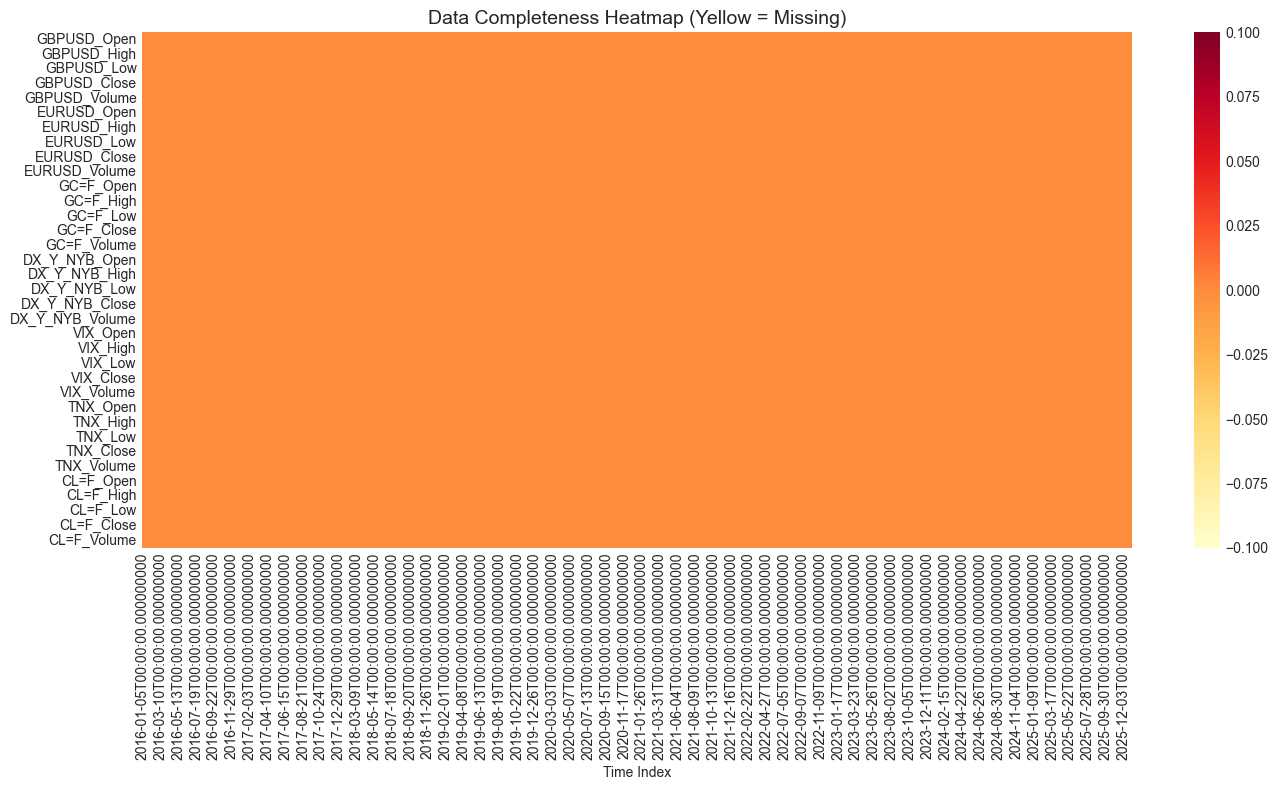

In [5]:
# Data completeness heatmap
if combined_data is not None:
    # Sample for visualization (too many rows would be slow)
    sample_size = min(500, len(combined_data))
    sample_idx = np.linspace(0, len(combined_data)-1, sample_size, dtype=int)
    sample_data = combined_data.iloc[sample_idx]
    
    plt.figure(figsize=(14, 8))
    sns.heatmap(
        sample_data.isna().T,
        cbar=True,
        cmap='YlOrRd',
        yticklabels=True
    )
    plt.title('Data Completeness Heatmap (Yellow = Missing)', fontsize=14)
    plt.xlabel('Time Index')
    plt.tight_layout()
    plt.show()

---
## 2. Price Visualization

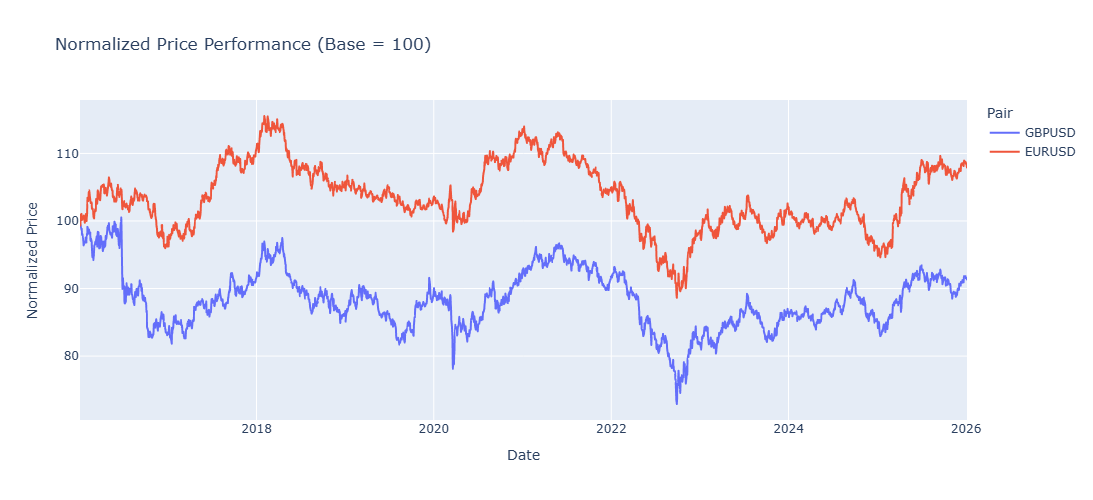

In [6]:
# Extract main pair close prices
if combined_data is not None:
    main_tickers = ['GBPUSD', 'EURUSD', 'XAUUSD']
    close_cols = [f'{t}_Close' for t in main_tickers if f'{t}_Close' in combined_data.columns]
    
    if close_cols:
        prices = combined_data[close_cols].copy()
        prices.columns = [c.replace('_Close', '') for c in prices.columns]
        
        # Normalize to 100 for comparison
        normalized = prices / prices.iloc[0] * 100
        
        # Plot normalized prices
        fig = px.line(
            normalized.reset_index(),
            x='Date',
            y=normalized.columns.tolist(),
            title='Normalized Price Performance (Base = 100)',
            labels={'value': 'Normalized Price', 'variable': 'Pair'}
        )
        fig.update_layout(height=500, hovermode='x unified')
        fig.show()

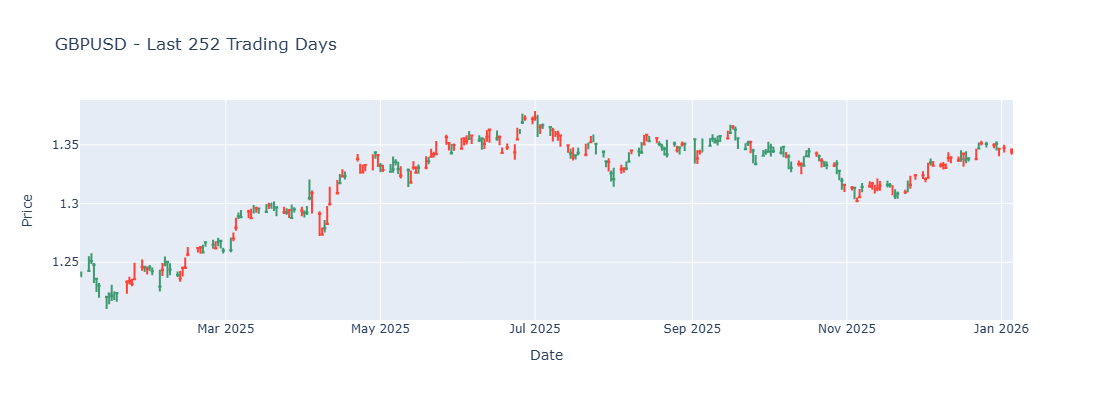

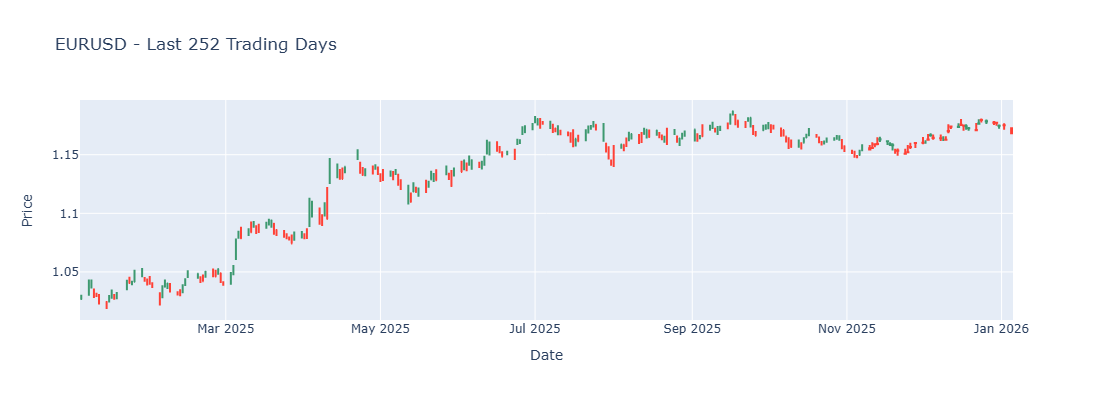

Missing columns for XAUUSD


In [7]:
# Individual candlestick charts
def plot_candlestick(df, ticker, last_n_days=252):
    """Plot candlestick chart for a ticker."""
    ohlc_cols = [f'{ticker}_{x}' for x in ['Open', 'High', 'Low', 'Close']]
    if not all(c in df.columns for c in ohlc_cols):
        print(f"Missing columns for {ticker}")
        return
    
    # Get last N days
    data = df[ohlc_cols].tail(last_n_days).copy()
    data.columns = ['Open', 'High', 'Low', 'Close']
    
    fig = go.Figure(data=[go.Candlestick(
        x=data.index,
        open=data['Open'],
        high=data['High'],
        low=data['Low'],
        close=data['Close'],
        name=ticker
    )])
    
    fig.update_layout(
        title=f'{ticker} - Last {last_n_days} Trading Days',
        yaxis_title='Price',
        xaxis_title='Date',
        height=400,
        xaxis_rangeslider_visible=False
    )
    fig.show()

if combined_data is not None:
    for ticker in ['GBPUSD', 'EURUSD', 'XAUUSD']:
        plot_candlestick(combined_data, ticker)

GBPUSD Returns: Mean=-0.0019%, Std=0.5926%, Skew=-0.92, Kurt=13.95
EURUSD Returns: Mean=0.0041%, Std=0.4696%, Skew=0.06, Kurt=2.19


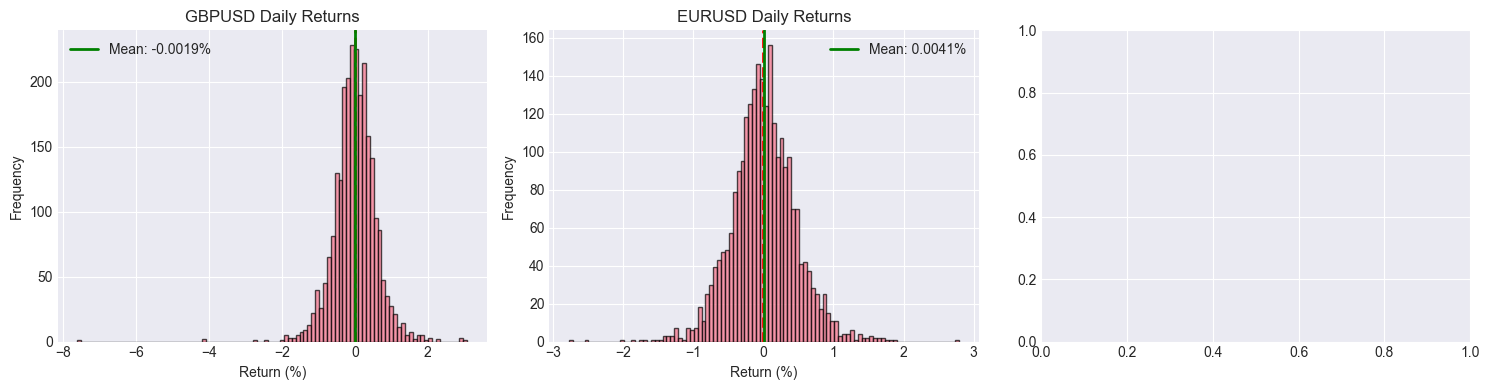

In [8]:
# Returns distribution
if combined_data is not None:
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    for i, ticker in enumerate(['GBPUSD', 'EURUSD', 'XAUUSD']):
        close_col = f'{ticker}_Close'
        if close_col in combined_data.columns:
            returns = combined_data[close_col].pct_change() * 100
            returns = returns.dropna()
            
            axes[i].hist(returns, bins=100, edgecolor='black', alpha=0.7)
            axes[i].axvline(x=0, color='red', linestyle='--', linewidth=2)
            axes[i].axvline(x=returns.mean(), color='green', linestyle='-', linewidth=2, label=f'Mean: {returns.mean():.4f}%')
            axes[i].set_title(f'{ticker} Daily Returns')
            axes[i].set_xlabel('Return (%)')
            axes[i].set_ylabel('Frequency')
            axes[i].legend()
            
            # Print stats
            print(f"{ticker} Returns: Mean={returns.mean():.4f}%, Std={returns.std():.4f}%, Skew={returns.skew():.2f}, Kurt={returns.kurtosis():.2f}")
    
    plt.tight_layout()
    plt.show()

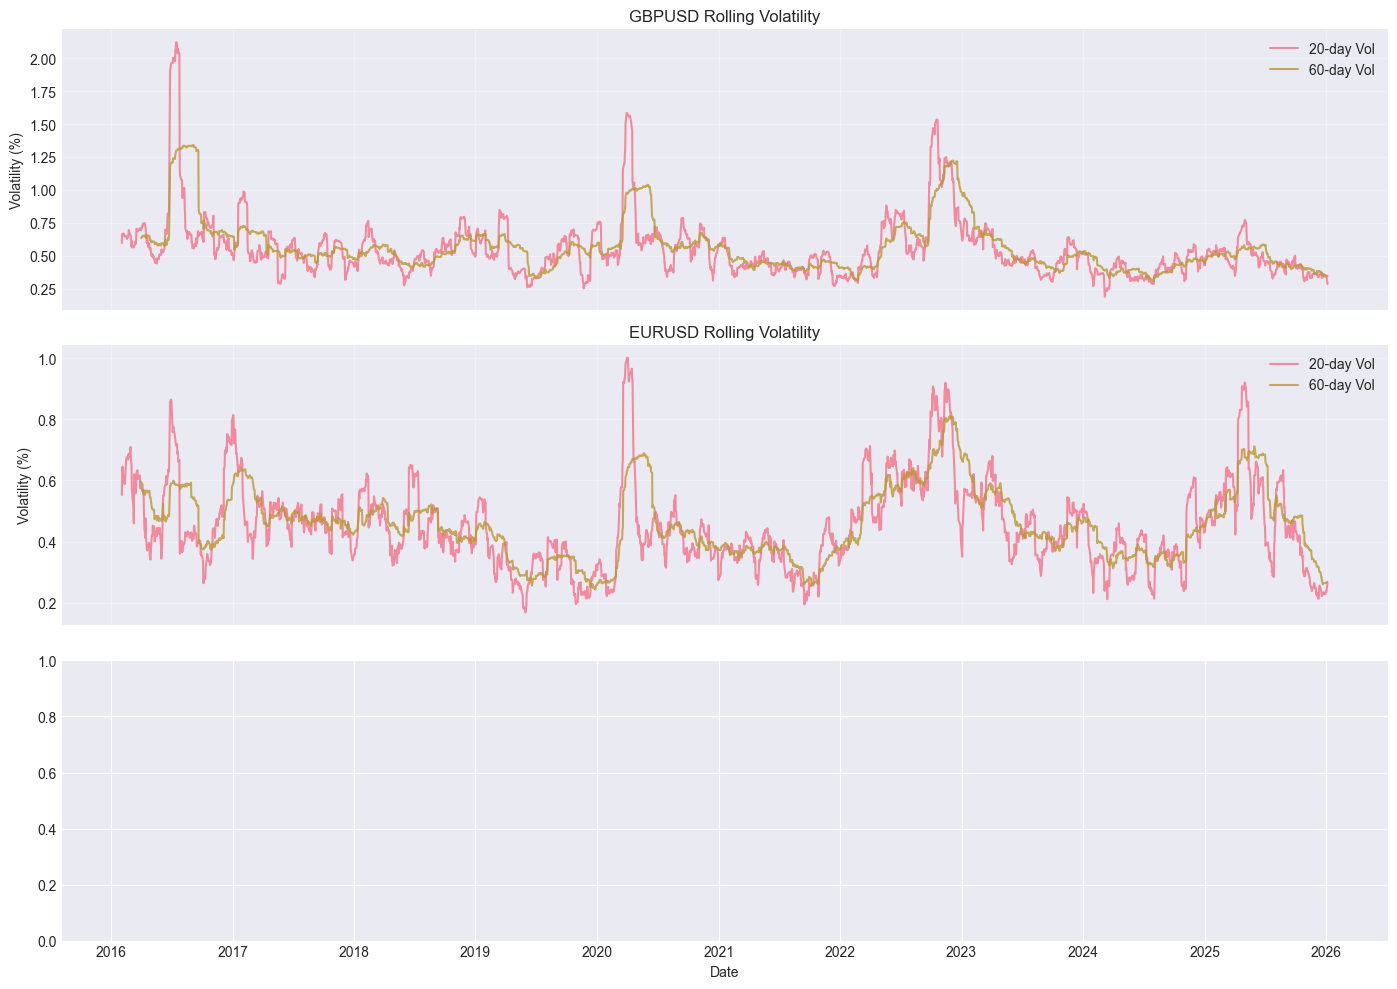

In [12]:
# Rolling volatility over time
if combined_data is not None:
    fig, axes = plt.subplots(3, 1, figsize=(14, 10), sharex=True)
    
    for i, ticker in enumerate(['GBPUSD', 'EURUSD', 'XAUUSD']):
        close_col = f'{ticker}_Close'
        if close_col in combined_data.columns:
            returns = combined_data[close_col].pct_change() * 100
            vol_20 = returns.rolling(20).std()
            vol_60 = returns.rolling(60).std()
            
            axes[i].plot(vol_20.index, vol_20, label='20-day Vol', alpha=0.8)
            axes[i].plot(vol_60.index, vol_60, label='60-day Vol', alpha=0.8)
            axes[i].set_title(f'{ticker} Rolling Volatility')
            axes[i].set_ylabel('Volatility (%)')
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)
    
    axes[-1].set_xlabel('Date')
    plt.tight_layout()
    plt.show()

---
## 3. Intermarket Analysis

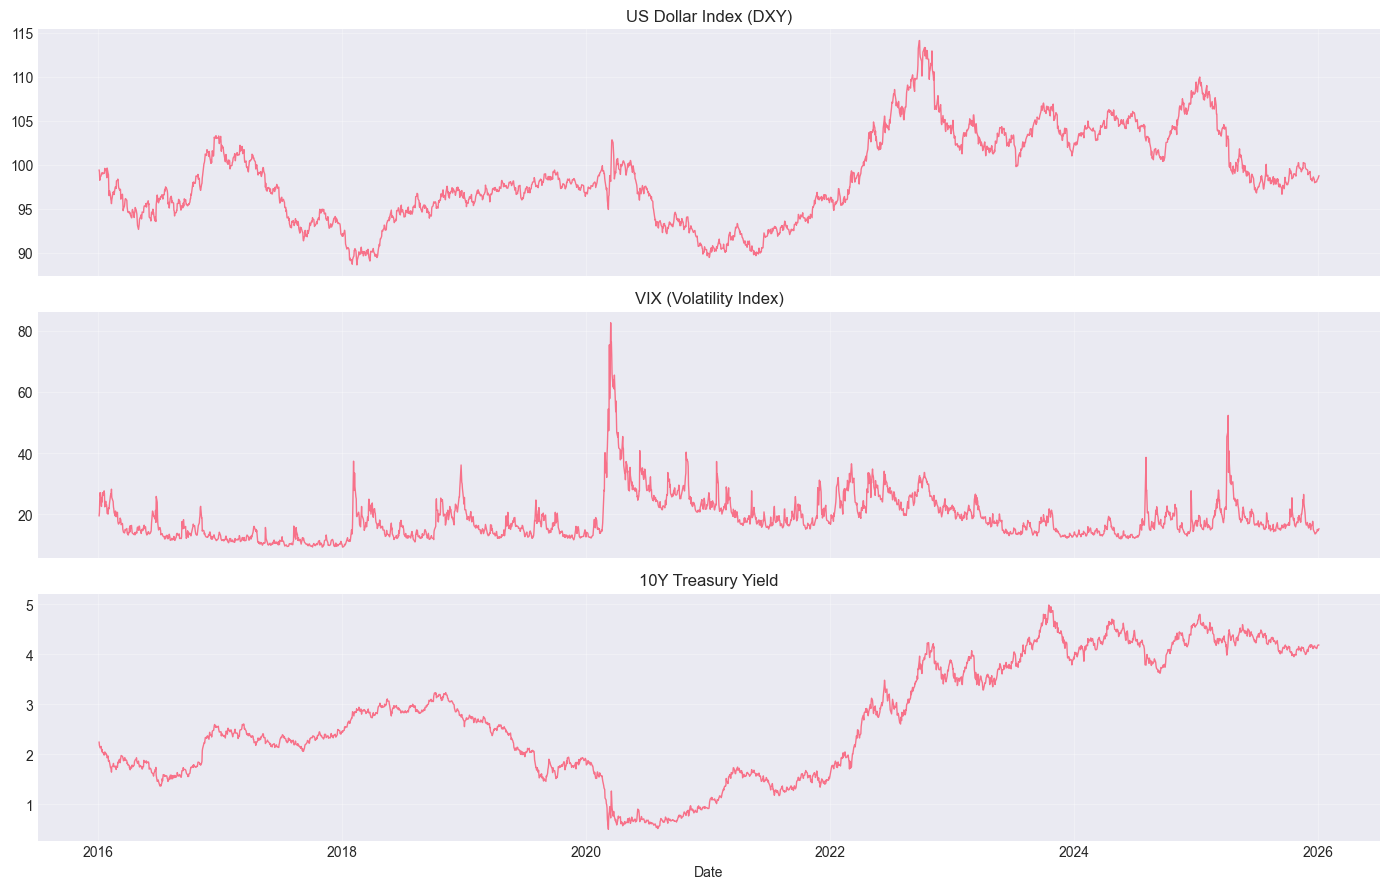

In [13]:
# Plot intermarket indicators
if combined_data is not None:
    intermarket_cols = {
        'DX_Y_NYB_Close': 'US Dollar Index (DXY)',
        'VIX_Close': 'VIX (Volatility Index)',
        'TNX_Close': '10Y Treasury Yield',
        'CL_F_Close': 'WTI Crude Oil'
    }
    
    available = {k: v for k, v in intermarket_cols.items() if k in combined_data.columns}
    
    if available:
        fig, axes = plt.subplots(len(available), 1, figsize=(14, 3*len(available)), sharex=True)
        if len(available) == 1:
            axes = [axes]
        
        for i, (col, name) in enumerate(available.items()):
            axes[i].plot(combined_data.index, combined_data[col], linewidth=1)
            axes[i].set_title(name)
            axes[i].grid(True, alpha=0.3)
        
        axes[-1].set_xlabel('Date')
        plt.tight_layout()
        plt.show()
    else:
        print("No intermarket data available")

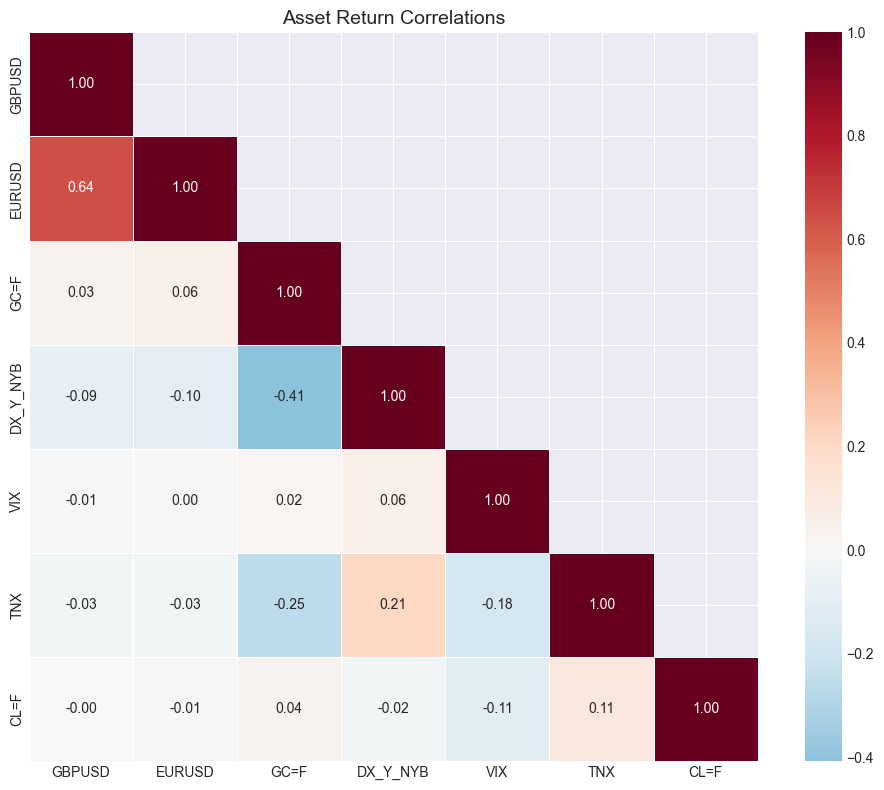

In [14]:
# Correlation heatmap (all assets)
if combined_data is not None:
    # Get close price columns only
    close_cols = [c for c in combined_data.columns if '_Close' in c]
    
    if close_cols:
        # Calculate returns for correlation
        returns = combined_data[close_cols].pct_change().dropna()
        
        # Correlation matrix
        corr = returns.corr()
        
        # Clean column names for display
        corr.columns = [c.replace('_Close', '') for c in corr.columns]
        corr.index = [c.replace('_Close', '') for c in corr.index]
        
        plt.figure(figsize=(10, 8))
        mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
        sns.heatmap(
            corr,
            mask=mask,
            annot=True,
            fmt='.2f',
            cmap='RdBu_r',
            center=0,
            square=True,
            linewidths=0.5
        )
        plt.title('Asset Return Correlations', fontsize=14)
        plt.tight_layout()
        plt.show()

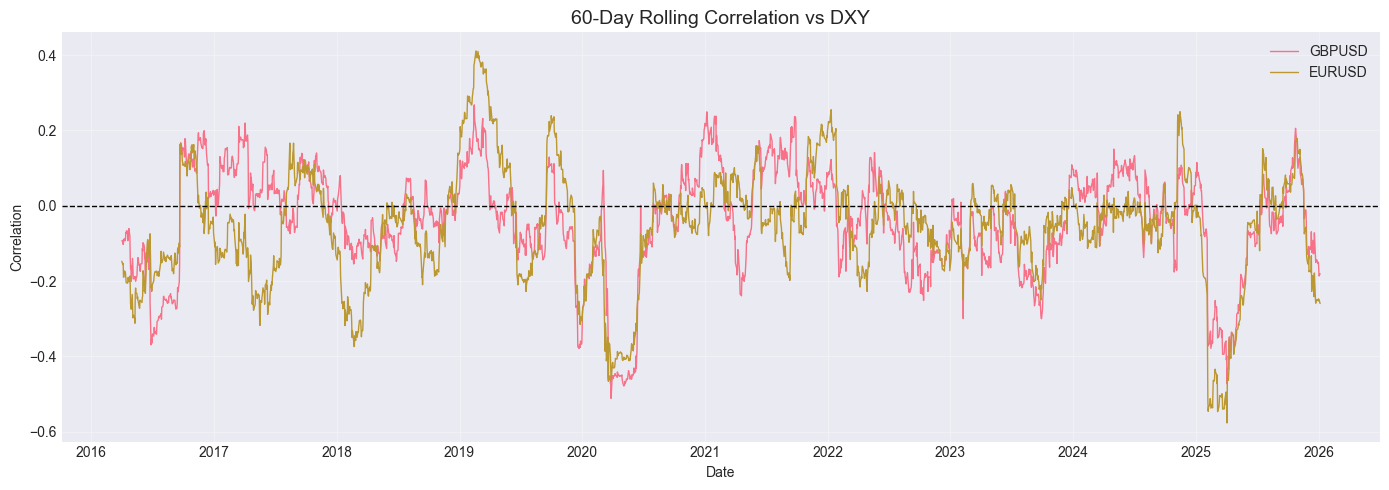

In [15]:
# Rolling correlation: FX pairs vs DXY
if combined_data is not None and 'DX_Y_NYB_Close' in combined_data.columns:
    dxy_returns = combined_data['DX_Y_NYB_Close'].pct_change()
    
    fig, ax = plt.subplots(figsize=(14, 5))
    
    for ticker in ['GBPUSD', 'EURUSD', 'XAUUSD']:
        close_col = f'{ticker}_Close'
        if close_col in combined_data.columns:
            pair_returns = combined_data[close_col].pct_change()
            rolling_corr = pair_returns.rolling(60).corr(dxy_returns)
            ax.plot(rolling_corr.index, rolling_corr, label=ticker, linewidth=1)
    
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
    ax.set_title('60-Day Rolling Correlation vs DXY', fontsize=14)
    ax.set_ylabel('Correlation')
    ax.set_xlabel('Date')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

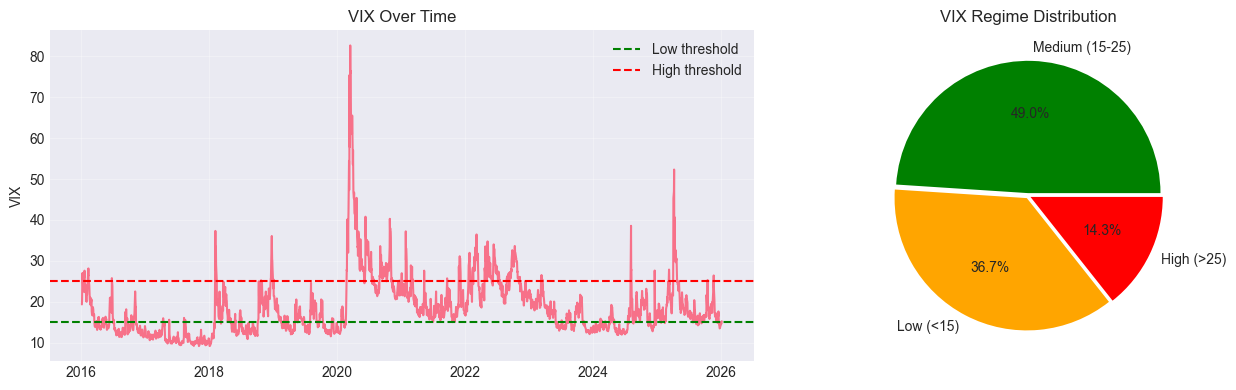


VIX Regime Statistics:
VIX_Close
Medium (15-25)    1229
Low (<15)          921
High (>25)         360
Name: count, dtype: int64


In [16]:
# VIX regime analysis
if combined_data is not None and 'VIX_Close' in combined_data.columns:
    vix = combined_data['VIX_Close']
    
    # Define regimes
    regime = pd.cut(
        vix,
        bins=[0, 15, 25, 100],
        labels=['Low (<15)', 'Medium (15-25)', 'High (>25)']
    )
    
    # Count days in each regime
    regime_counts = regime.value_counts()
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    
    # VIX time series
    axes[0].plot(vix.index, vix)
    axes[0].axhline(y=15, color='green', linestyle='--', label='Low threshold')
    axes[0].axhline(y=25, color='red', linestyle='--', label='High threshold')
    axes[0].set_title('VIX Over Time')
    axes[0].set_ylabel('VIX')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Regime distribution
    colors = ['green', 'orange', 'red']
    axes[1].pie(
        regime_counts,
        labels=regime_counts.index,
        autopct='%1.1f%%',
        colors=colors,
        explode=[0.02, 0.02, 0.02]
    )
    axes[1].set_title('VIX Regime Distribution')
    
    plt.tight_layout()
    plt.show()
    
    print("\nVIX Regime Statistics:")
    print(regime_counts)

---
## 4. Technical Indicators

In [17]:
# Load features if available
if features_path.exists():
    features = pd.read_parquet(features_path)
    print(f"Features shape: {features.shape}")
    print(f"Date range: {features.index.min()} to {features.index.max()}")
else:
    print(f"Features not found at {features_path}")
    print("Run: python main.py --mode features")
    features = None

Features shape: (1509, 213)
Date range: 2020-01-03 00:00:00 to 2026-01-02 00:00:00


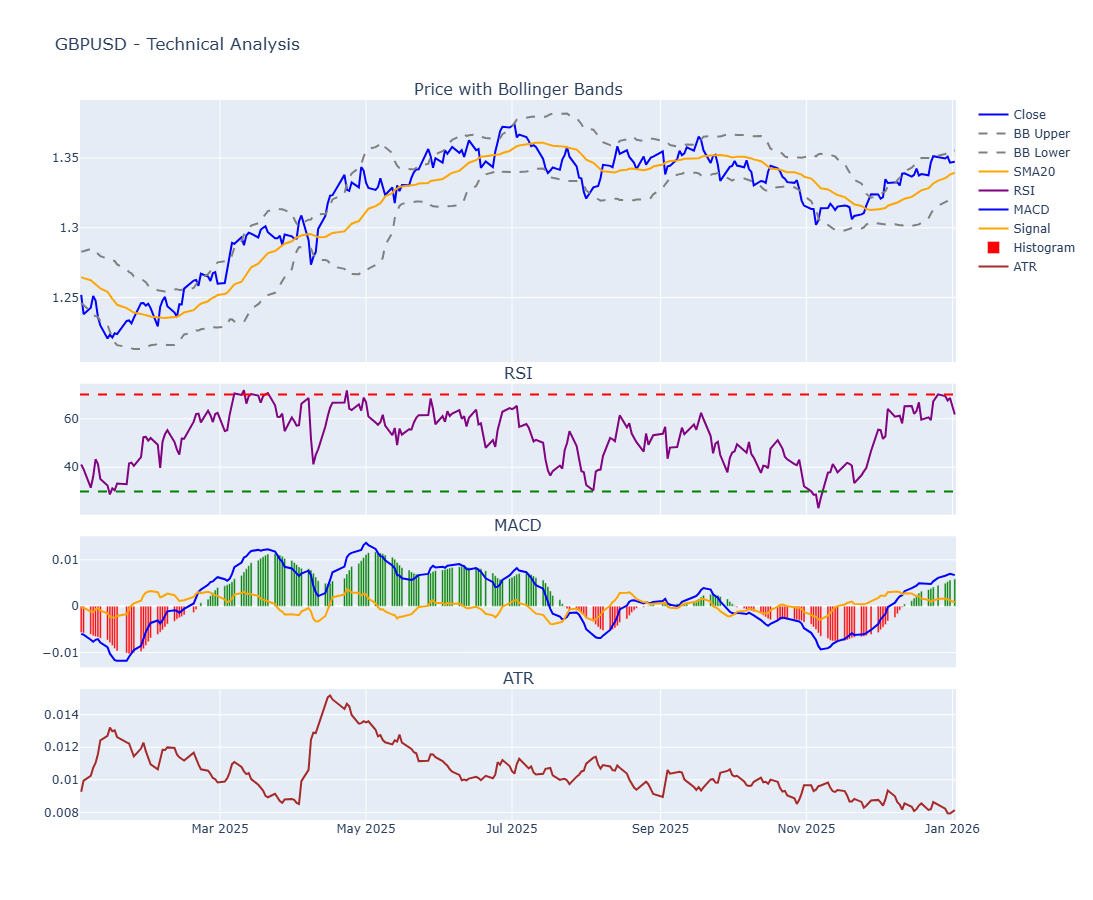

In [18]:
# Plot GBPUSD with indicators
if features is not None:
    ticker = 'GBPUSD'
    last_n = 252  # 1 year
    
    data = features.tail(last_n)
    
    fig = make_subplots(
        rows=4, cols=1,
        shared_xaxes=True,
        vertical_spacing=0.03,
        row_heights=[0.4, 0.2, 0.2, 0.2],
        subplot_titles=['Price with Bollinger Bands', 'RSI', 'MACD', 'ATR']
    )
    
    # Price and Bollinger Bands
    if f'{ticker}_Close' in data.columns:
        fig.add_trace(go.Scatter(x=data.index, y=data[f'{ticker}_Close'], name='Close', line=dict(color='blue')), row=1, col=1)
    if f'{ticker}_BB_Upper' in data.columns:
        fig.add_trace(go.Scatter(x=data.index, y=data[f'{ticker}_BB_Upper'], name='BB Upper', line=dict(color='gray', dash='dash')), row=1, col=1)
    if f'{ticker}_BB_Lower' in data.columns:
        fig.add_trace(go.Scatter(x=data.index, y=data[f'{ticker}_BB_Lower'], name='BB Lower', line=dict(color='gray', dash='dash')), row=1, col=1)
    if f'{ticker}_SMA_20' in data.columns:
        fig.add_trace(go.Scatter(x=data.index, y=data[f'{ticker}_SMA_20'], name='SMA20', line=dict(color='orange')), row=1, col=1)
    
    # RSI
    if f'{ticker}_RSI' in data.columns:
        fig.add_trace(go.Scatter(x=data.index, y=data[f'{ticker}_RSI'], name='RSI', line=dict(color='purple')), row=2, col=1)
        fig.add_hline(y=70, line_dash='dash', line_color='red', row=2, col=1)
        fig.add_hline(y=30, line_dash='dash', line_color='green', row=2, col=1)
    
    # MACD
    if f'{ticker}_MACD' in data.columns:
        fig.add_trace(go.Scatter(x=data.index, y=data[f'{ticker}_MACD'], name='MACD', line=dict(color='blue')), row=3, col=1)
    if f'{ticker}_MACD_Signal' in data.columns:
        fig.add_trace(go.Scatter(x=data.index, y=data[f'{ticker}_MACD_Signal'], name='Signal', line=dict(color='orange')), row=3, col=1)
    if f'{ticker}_MACD_Histogram' in data.columns:
        colors = ['green' if x > 0 else 'red' for x in data[f'{ticker}_MACD_Histogram']]
        fig.add_trace(go.Bar(x=data.index, y=data[f'{ticker}_MACD_Histogram'], name='Histogram', marker_color=colors), row=3, col=1)
    
    # ATR
    if f'{ticker}_ATR' in data.columns:
        fig.add_trace(go.Scatter(x=data.index, y=data[f'{ticker}_ATR'], name='ATR', line=dict(color='brown')), row=4, col=1)
    
    fig.update_layout(height=900, title=f'{ticker} - Technical Analysis', showlegend=True)
    fig.show()

In [19]:
# RSI signal analysis: What happens after RSI < 30?
if features is not None:
    for ticker in ['GBPUSD', 'EURUSD', 'XAUUSD']:
        rsi_col = f'{ticker}_RSI'
        target_col = f'{ticker}_Target_Return'
        
        if rsi_col in features.columns and target_col in features.columns:
            df = features[[rsi_col, target_col]].dropna()
            
            # Oversold (RSI < 30)
            oversold = df[df[rsi_col] < 30][target_col]
            # Overbought (RSI > 70)
            overbought = df[df[rsi_col] > 70][target_col]
            # Normal
            normal = df[(df[rsi_col] >= 30) & (df[rsi_col] <= 70)][target_col]
            
            print(f"\n{ticker} Next-Day Return by RSI Zone:")
            print(f"  Oversold (<30): Mean={oversold.mean():.4f}%, Count={len(oversold)}")
            print(f"  Normal (30-70): Mean={normal.mean():.4f}%, Count={len(normal)}")
            print(f"  Overbought (>70): Mean={overbought.mean():.4f}%, Count={len(overbought)}")


GBPUSD Next-Day Return by RSI Zone:
  Oversold (<30): Mean=-0.0226%, Count=61
  Normal (30-70): Mean=0.0036%, Count=1407
  Overbought (>70): Mean=0.0214%, Count=41

EURUSD Next-Day Return by RSI Zone:
  Oversold (<30): Mean=0.1643%, Count=62
  Normal (30-70): Mean=0.0002%, Count=1379
  Overbought (>70): Mean=-0.0634%, Count=68


---
## 5. Feature Analysis

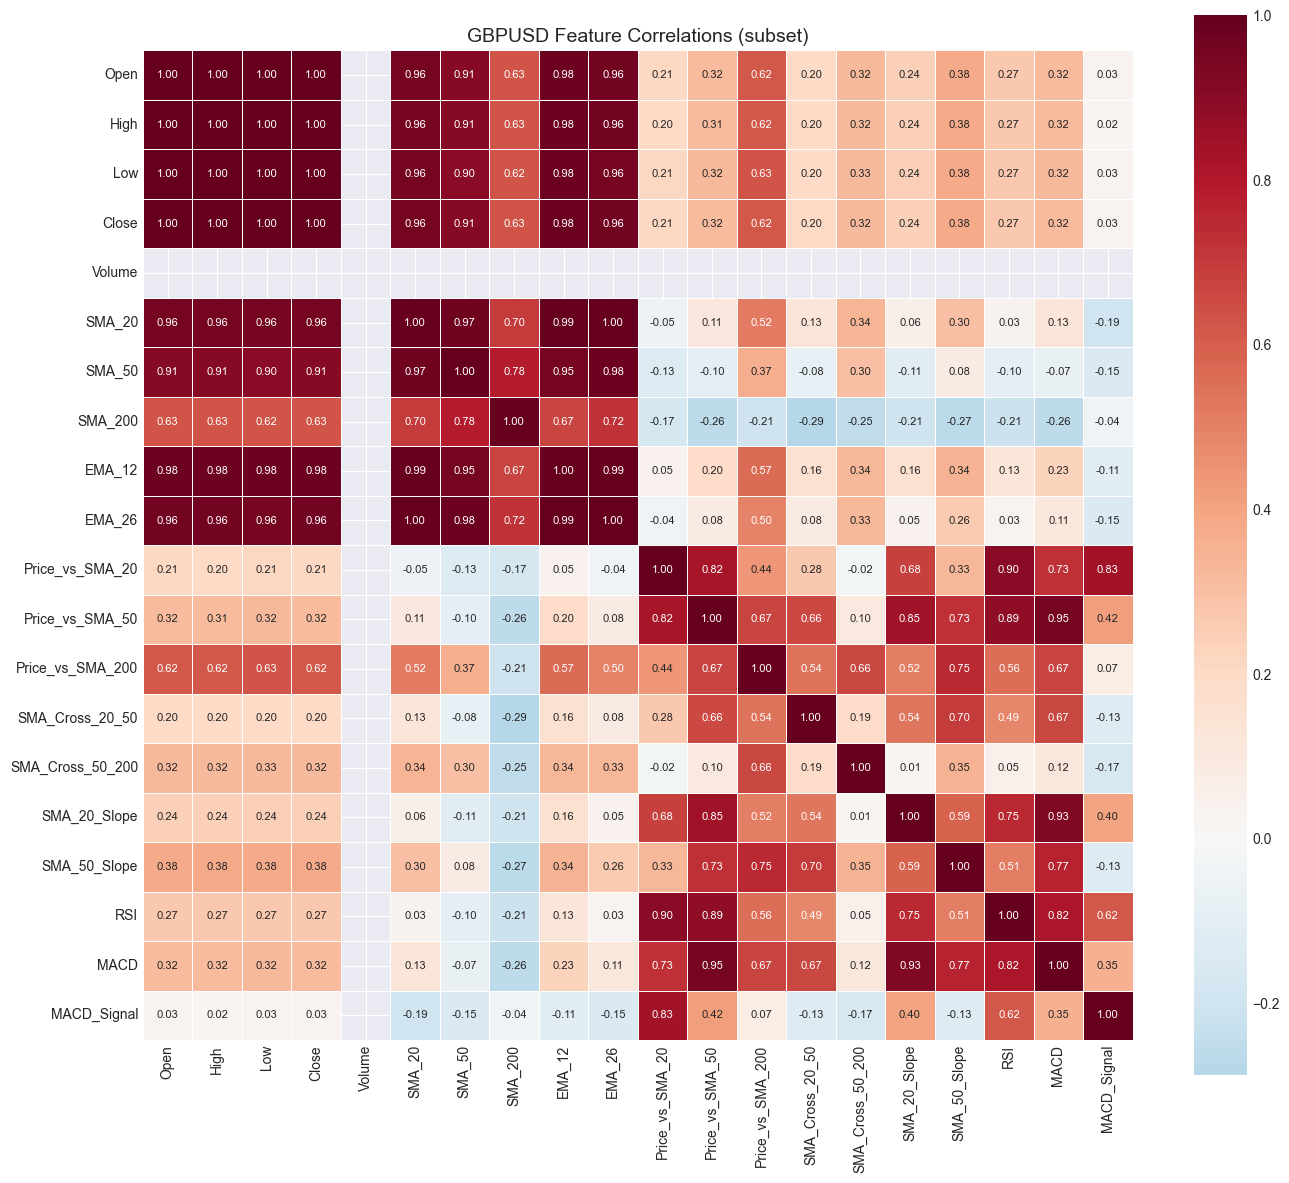

In [20]:
# Feature correlation heatmap (subset)
if features is not None:
    # Get feature columns for one ticker
    ticker = 'GBPUSD'
    ticker_cols = [c for c in features.columns if c.startswith(ticker) and 'Target' not in c]
    
    if len(ticker_cols) > 0:
        # Limit to first 20 features for readability
        cols_subset = ticker_cols[:20]
        
        corr = features[cols_subset].corr()
        corr.columns = [c.replace(f'{ticker}_', '') for c in corr.columns]
        corr.index = [c.replace(f'{ticker}_', '') for c in corr.index]
        
        plt.figure(figsize=(14, 12))
        sns.heatmap(
            corr,
            annot=True,
            fmt='.2f',
            cmap='RdBu_r',
            center=0,
            square=True,
            linewidths=0.5,
            annot_kws={'size': 8}
        )
        plt.title(f'{ticker} Feature Correlations (subset)', fontsize=14)
        plt.tight_layout()
        plt.show()

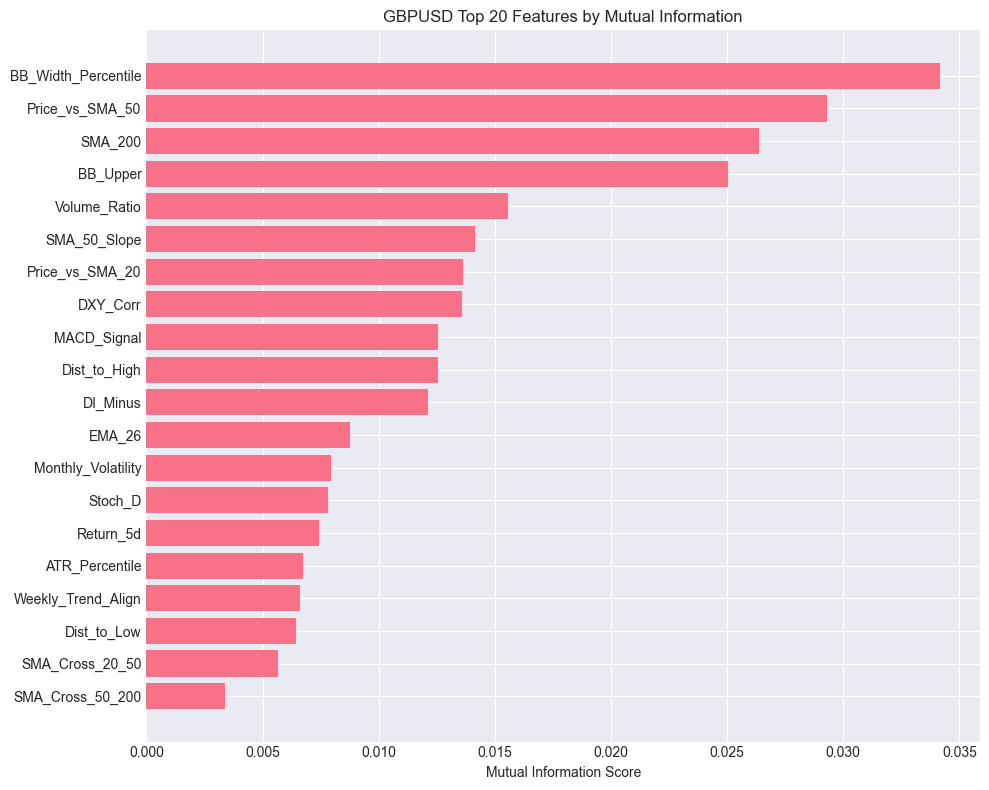

In [21]:
# Feature importance preview using mutual information
if features is not None:
    from sklearn.feature_selection import mutual_info_classif
    
    ticker = 'GBPUSD'
    target_col = f'{ticker}_Target_Direction'
    
    if target_col in features.columns:
        # Get feature columns
        feature_cols = [c for c in features.columns if c.startswith(ticker) and 'Target' not in c]
        
        # Prepare data
        X = features[feature_cols].dropna()
        y = features.loc[X.index, target_col]
        
        # Remove any remaining NaN
        mask = ~(X.isna().any(axis=1) | y.isna())
        X = X[mask]
        y = y[mask]
        
        if len(X) > 100:
            # Calculate mutual information
            mi_scores = mutual_info_classif(X, y, random_state=42)
            mi_df = pd.DataFrame({
                'Feature': [c.replace(f'{ticker}_', '') for c in feature_cols],
                'MI Score': mi_scores
            }).sort_values('MI Score', ascending=True)
            
            # Plot top 20
            plt.figure(figsize=(10, 8))
            plt.barh(mi_df['Feature'].tail(20), mi_df['MI Score'].tail(20))
            plt.xlabel('Mutual Information Score')
            plt.title(f'{ticker} Top 20 Features by Mutual Information')
            plt.tight_layout()
            plt.show()
        else:
            print(f"Not enough samples: {len(X)}")

In [ ]:
# Target distribution (class balance)
if features is not None:
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    
    for i, ticker in enumerate(['GBPUSD', 'EURUSD', 'XAUUSD']):
        target_col = f'{ticker}_Target_Direction'
        
        if target_col in features.columns:
            counts = features[target_col].value_counts()
            
            axes[i].pie(
                counts,
                labels=['Down (0)', 'Up (1)'],
                autopct='%1.1f%%',
                colors=['red', 'green'],
                explode=[0.02, 0.02]
            )
            axes[i].set_title(f'{ticker} Target Distribution')
    
    plt.tight_layout()
    plt.show()
    
    # Print exact numbers
    print("\nTarget Distribution:")
    for ticker in ['GBPUSD', 'EURUSD', 'XAUUSD']:
        target_col = f'{ticker}_Target_Direction'
        if target_col in features.columns:
            counts = features[target_col].value_counts()
            total = len(features[target_col].dropna())
            print(f"  {ticker}: Up={counts.get(1, 0)} ({counts.get(1, 0)/total*100:.1f}%), Down={counts.get(0, 0)} ({counts.get(0, 0)/total*100:.1f}%)")

---
## Summary

This notebook has explored:
1. **Data Quality**: Checked for missing values and data completeness
2. **Price Visualization**: Normalized prices, candlesticks, returns distribution, volatility
3. **Intermarket Analysis**: DXY, VIX, correlations between assets
4. **Technical Indicators**: Visual analysis of indicators and their predictive power
5. **Feature Analysis**: Correlations, mutual information, target balance

### Key Findings
- Check the correlation heatmap for multicollinearity
- Review VIX regime impacts on returns
- Examine RSI signal effectiveness
- Note target class balance for model training